In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

/home/suchit/.conda/envs/shap_torch/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [13]:
nn = pd.read_csv("/results/approximations/tables/nn.csv")
linear = pd.read_csv("/results/approximations/tables/linear.csv")
tree = pd.read_csv("/results/approximations/tables/tree.csv")
agnostic = pd.read_csv("/results/approximations/tables/agnostic.csv")


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
magma_palette = [
    "#000004", "#1a0004", "#380004", "#4e0007", "#68000c", "#7f000e", "#950012", "#aa0017",
    "#bd0021", "#cf002c", "#e0003a", "#f0004a", "#ff005c", "#ff1e6e", "#ff407d", "#ff628b",
    "#ff8196", "#fa9fa6", "#f8b5b4", "#f2ccc9", "#ebded2", "#e5f0db", "#ddf6e6", "#d3f8ed",
    "#c4f9f1", "#b4f9f6", "#a3faf9", "#91fafa", "#7ffafb", "#6cfafa", "#5af9f9", "#49f8f6",
    "#3af7f2", "#2cf5ed", "#20f2e7", "#1af0df", "#17eed6", "#18ebcc", "#1de7c3", "#24e2ba",
    "#2bdeb1", "#34d9a9", "#3fd4a1", "#4dce99", "#5cc891", "#6fc189", "#81b97f", "#95b077",
    "#abb66e", "#c1b766", "#d7b75f", "#edba59", "#ffb84f"
]


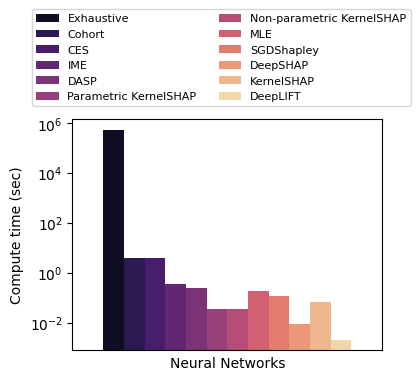

In [15]:
plt.figure(figsize=(4, 3))
color = ['#003f5c','#58508d','#bc5090','#ff6361','#ffa600']
# edgecolor = ['black','red','green','orange','blue']

ax = sns.barplot(nn, x='Model', y='Time', hue='Approximation', palette="magma", errorbar=None)
plt.yscale('log')
# plt.grid(axis='x', linestyle='-', alpha=0.25)
# plt.grid(axis='y', linestyle='-', alpha=0.25)     
ax.set_xticks([])
ax.set
plt.xlabel("Neural Networks", fontdict={'size':10}, loc='center')
plt.ylabel("Compute time (sec)", fontdict={'size':10}, loc='center')
plt.legend(bbox_to_anchor=(0.48, 1.5), ncols=2, loc='upper center', fontsize=8)
plt.savefig('time/nn.pdf')


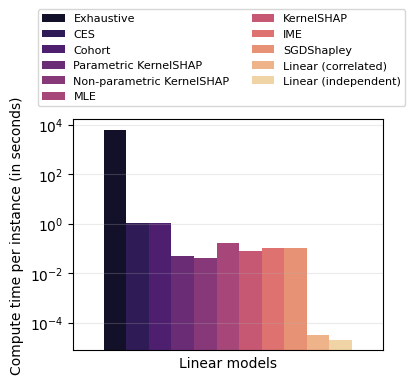

In [16]:
plt.figure(figsize=(4, 3))
color = ['#003f5c','#58508d','#bc5090','#ff6361','#ffa600']
# edgecolor = ['black','red','green','orange','blue']

ax = sns.barplot(linear, x='Model', y='Time', hue='Approximation', palette="magma", errorbar=None)
plt.yscale('log')
plt.grid(axis='x', linestyle='-', alpha=0.25)
plt.grid(axis='y', linestyle='-', alpha=0.25)     
ax.set_xticks([])
ax.set
plt.xlabel("Linear models", fontdict={'size':10}, loc='center')
plt.ylabel("Compute time per instance (in seconds)", fontdict={'size':10}, loc='center')
plt.legend(bbox_to_anchor=(0.48, 1.5), ncols=2, loc='upper center', fontsize=8)
plt.savefig('time/linear.pdf')


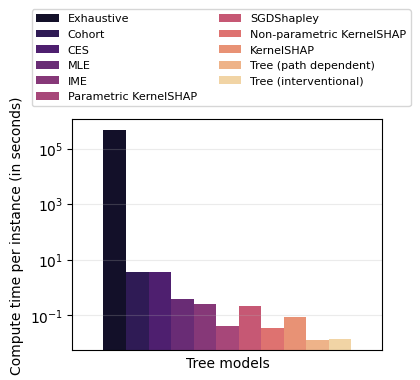

In [17]:
plt.figure(figsize=(4, 3))
color = ['#003f5c','#58508d','#bc5090','#ff6361','#ffa600']
# edgecolor = ['black','red','green','orange','blue']

ax = sns.barplot(tree, x='Model', y='Time', hue='Approximation', palette="magma", errorbar=None)
plt.yscale('log')
plt.grid(axis='x', linestyle='-', alpha=0.25)
plt.grid(axis='y', linestyle='-', alpha=0.25)     
ax.set_xticks([])
ax.set
plt.xlabel("Tree models", fontdict={'size':10}, loc='center')
plt.ylabel("Compute time per instance (in seconds)", fontdict={'size':10}, loc='center')
plt.legend(bbox_to_anchor=(0.48, 1.5), ncols=2, loc='upper center', fontsize=8)
plt.savefig('time/tree.pdf')


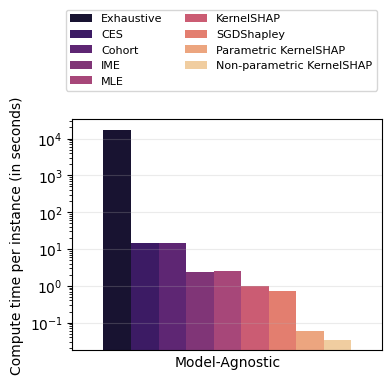

In [18]:
plt.figure(figsize=(4, 3))
color = ['#003f5c','#58508d','#bc5090','#ff6361','#ffa600']
# edgecolor = ['black','red','green','orange','blue']

ax = sns.barplot(agnostic, x='Model', y='Time', hue='Approximation', palette="magma", errorbar=None)
plt.yscale('log')
plt.grid(axis='x', linestyle='-', alpha=0.25)
plt.grid(axis='y', linestyle='-', alpha=0.25)     
ax.set_xticks([])
ax.set
plt.xlabel("Model-Agnostic", fontdict={'size':10}, loc='center')
plt.ylabel("Compute time per instance (in seconds)", fontdict={'size':10}, loc='center')
plt.legend(bbox_to_anchor=(0.48, 1.5), ncols=2, loc='upper center', fontsize=8)
plt.savefig('time/agnostic.pdf')


In [22]:
linear_pivoted = linear.iloc[:, 1:].pivot(index='Dataset', columns='Approximation', values='Accuracy')
nn_pivoted = nn.iloc[:, 1:].pivot(index='Dataset', columns='Approximation', values='Accuracy')
tree_pivoted = tree.iloc[:, 1:].pivot(index='Dataset', columns='Approximation', values='Accuracy')
agnostic_pivoted = agnostic.iloc[:, 1:].pivot(index='Dataset', columns='Approximation', values='Accuracy')

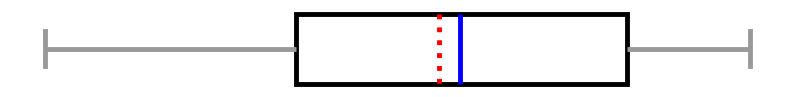

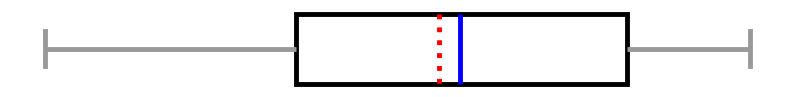

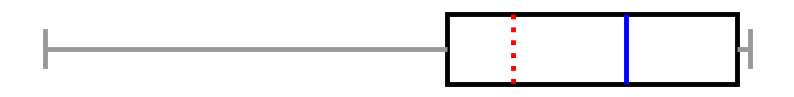

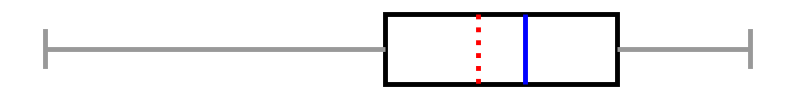

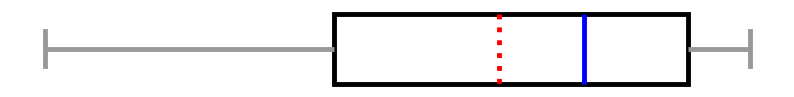

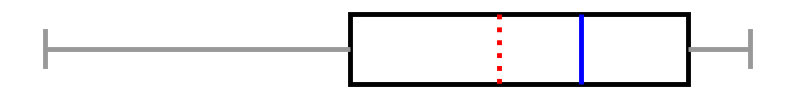

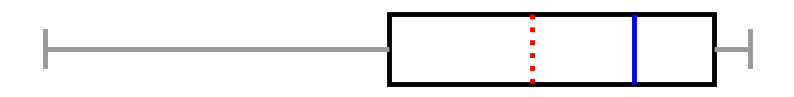

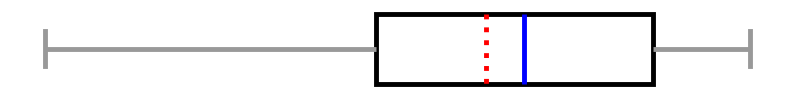

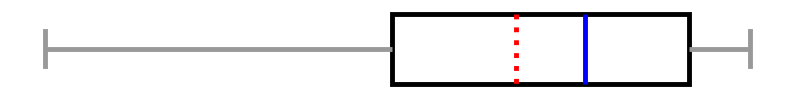

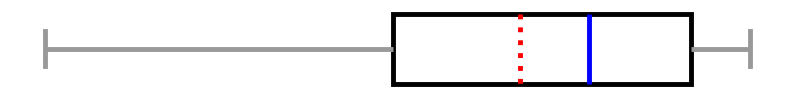

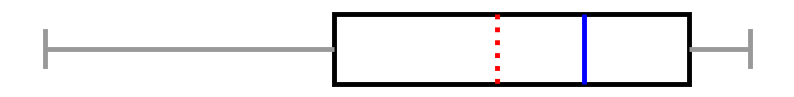

In [24]:
metric = 'Accuracy'
methods = linear_pivoted.columns
means = dict()
for method in methods:
    plt.figure(figsize=(10, 1))
    sns.boxplot(data=linear_pivoted[linear_pivoted[method]>99.5][method], orient='h', color='white', linewidth=3.5, showcaps=True, whiskerprops={'linewidth':3.5}, boxprops={'edgecolor':'black'}, medianprops={'color':'blue'}, showfliers=False)


    mean_value = linear_pivoted[linear_pivoted[method]>99.5][method].mean()
    means[method] = mean_value
    # print(method)
    plt.vlines(mean_value, ymin=-0.4, ymax=0.4, color='red', linestyles='dotted', linewidth=3.5)
    plt.axis('off')
    plt.savefig(f'boxplot/linear/{method}_{metric}.pdf')

/home/suchit/.conda/envs/shap_torch/lib/python3.10/site-packages/seaborn/_base.py:1599: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


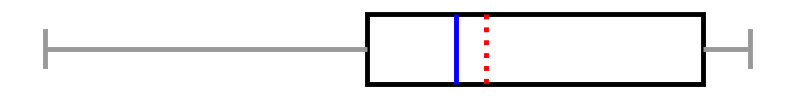

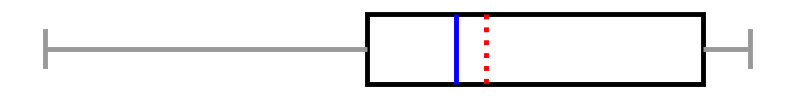

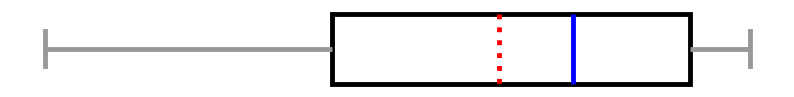

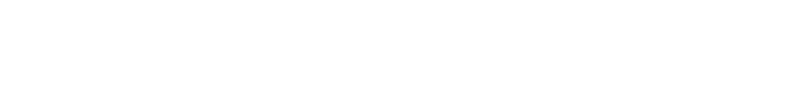

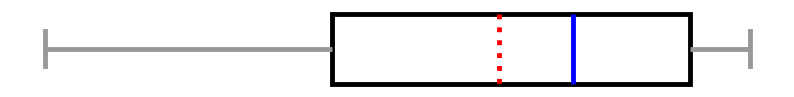

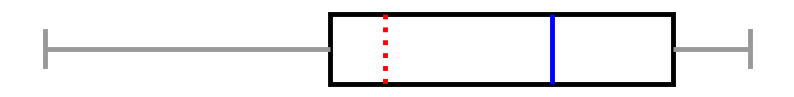

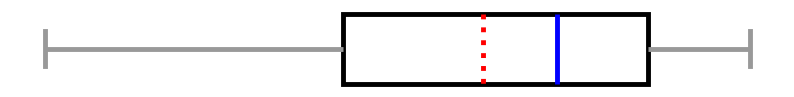

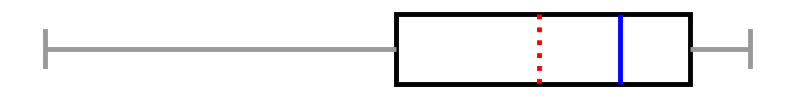

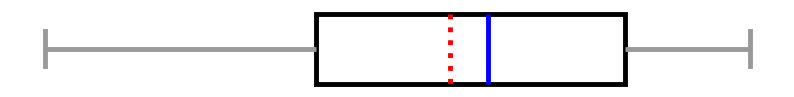

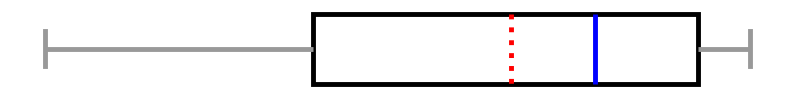

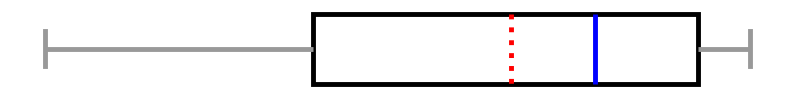

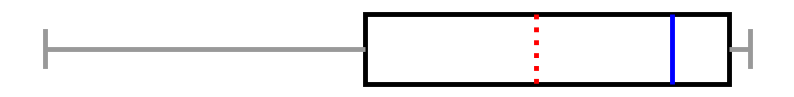

In [26]:
metric = 'Accuracy'
methods = nn_pivoted.columns
means = dict()
for method in methods:
    plt.figure(figsize=(10, 1))
    sns.boxplot(data=nn_pivoted[nn_pivoted[method]>99.5][method], orient='h', color='white', linewidth=3.5, showcaps=True, whiskerprops={'linewidth':3.5}, boxprops={'edgecolor':'black'}, medianprops={'color':'blue'}, showfliers=False)


    mean_value = nn_pivoted[nn_pivoted[method]>99.5][method].mean()
    means[method] = mean_value
    # print(method)
    plt.vlines(mean_value, ymin=-0.4, ymax=0.4, color='red', linestyles='dotted', linewidth=3.5)
    plt.axis('off')
    plt.savefig(f'boxplot/nn/{method}_{metric}.pdf')

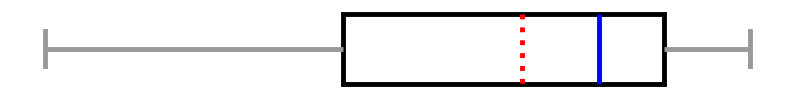

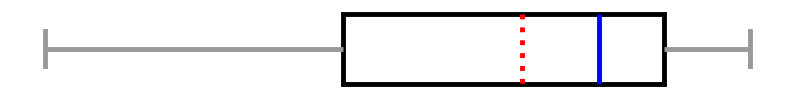

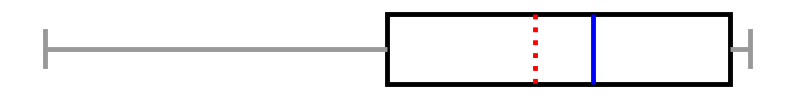

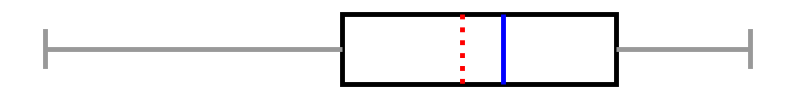

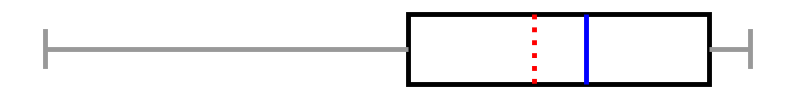

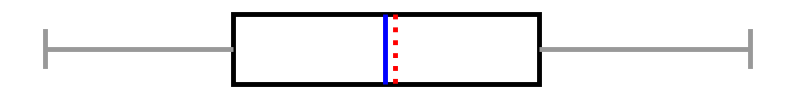

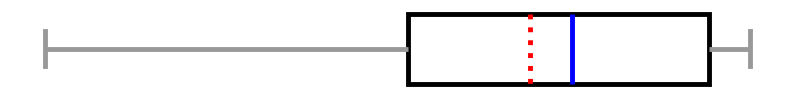

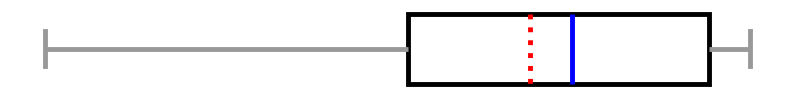

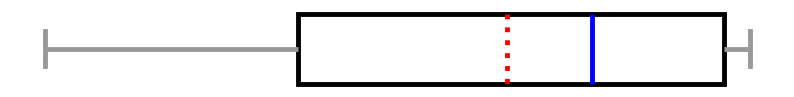

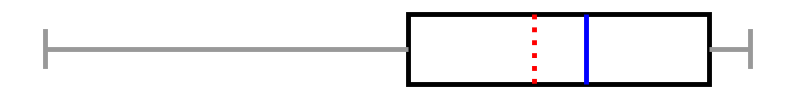

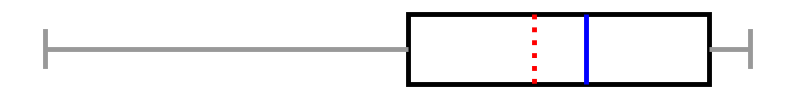

In [27]:
metric = 'Accuracy'
methods = tree_pivoted.columns
means = dict()
for method in methods:
    plt.figure(figsize=(10, 1))
    sns.boxplot(data=tree_pivoted[tree_pivoted[method]>99.5][method], orient='h', color='white', linewidth=3.5, showcaps=True, whiskerprops={'linewidth':3.5}, boxprops={'edgecolor':'black'}, medianprops={'color':'blue'}, showfliers=False)


    mean_value = tree_pivoted[tree_pivoted[method]>99.5][method].mean()
    means[method] = mean_value
    # print(method)
    plt.vlines(mean_value, ymin=-0.4, ymax=0.4, color='red', linestyles='dotted', linewidth=3.5)
    plt.axis('off')
    plt.savefig(f'boxplot/tree/{method}_{metric}.pdf')

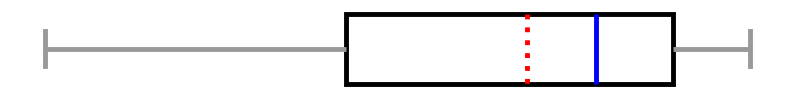

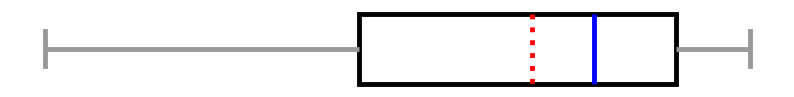

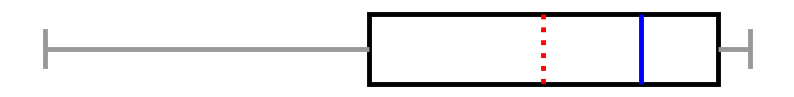

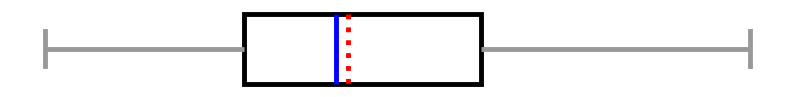

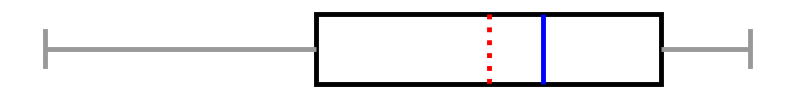

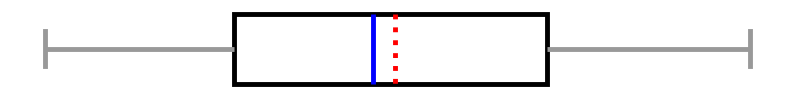

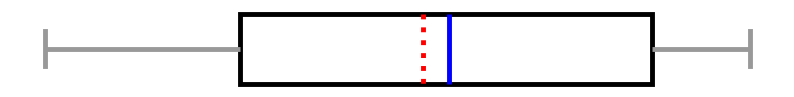

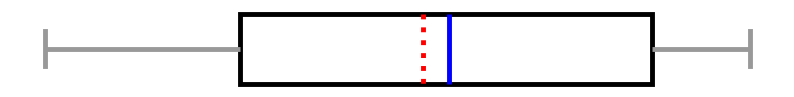

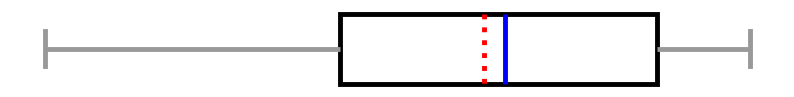

In [28]:
metric = 'Accuracy'
methods = agnostic_pivoted.columns
means = dict()
for method in methods:
    plt.figure(figsize=(10, 1))
    sns.boxplot(data=agnostic_pivoted[agnostic_pivoted[method]>99.5][method], orient='h', color='white', linewidth=3.5, showcaps=True, whiskerprops={'linewidth':3.5}, boxprops={'edgecolor':'black'}, medianprops={'color':'blue'}, showfliers=False)


    mean_value = agnostic_pivoted[agnostic_pivoted[method]>99.5][method].mean()
    means[method] = mean_value
    # print(method)
    plt.vlines(mean_value, ymin=-0.4, ymax=0.4, color='red', linestyles='dotted', linewidth=3.5)
    plt.axis('off')
    plt.savefig(f'boxplot/agnostic/{method}_{metric}.pdf')

['CES' 'Cohort' 'Exhaustive Sampling' 'IME' 'KernelSHAP' 'MLE'
 'Non-parametric KernelSHAP' 'Parametric KernelSHAP' 'SGDShapley'
 'Tree (interventional)' 'Tree (path dependent)' 'DASP' 'DeepLIFT'
 'DeepSHAP' 'Linear (correlated)' 'Linear (independent)']


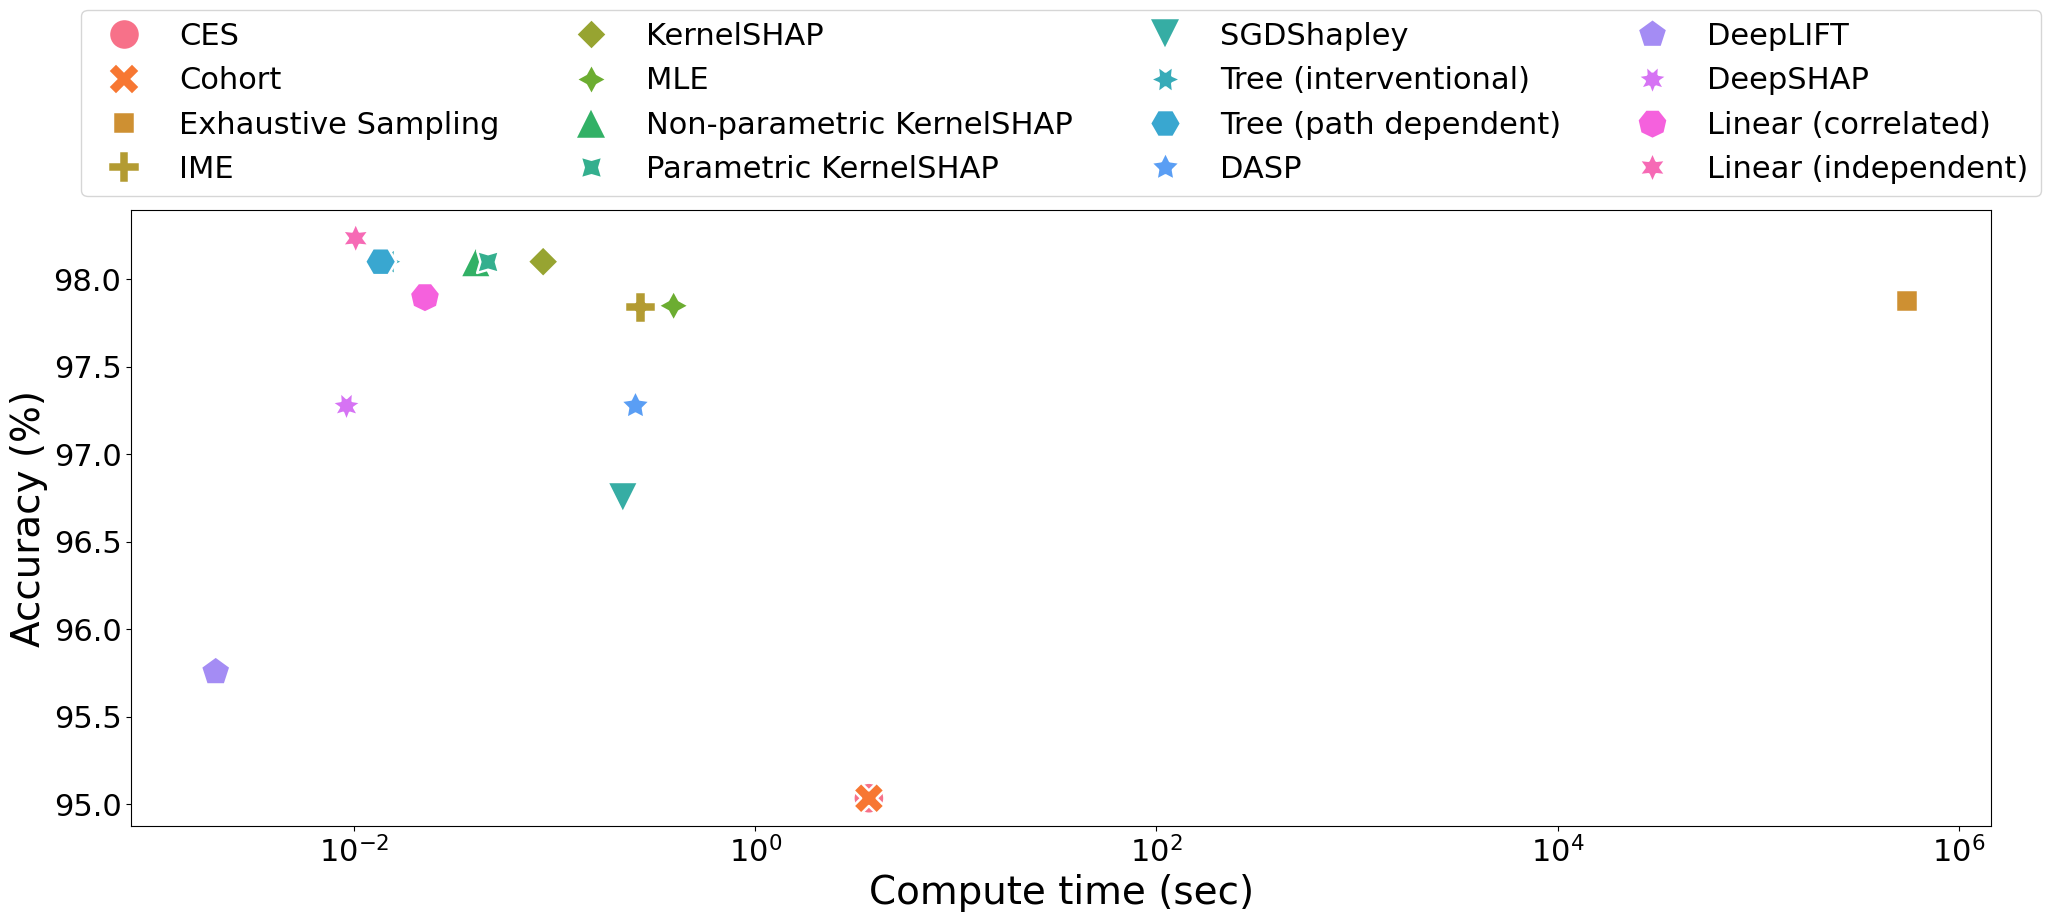

In [33]:
df = pd.read_csv('/data/suchit/project1/experiments/github/agnostic/tables/tradeoff.csv')
plt.figure(figsize=(24, 8))
categories = df['Approximation'].unique()

print(categories)
markers = ['o', 's', 'D', '^', 'v', '>', '<', '+', 'x', '*', '.', ',', 'd', 'h', 'H', 'p']
sns.scatterplot(df, x=df['Time'], y=df['Accuracy'], hue=df['Approximation'], style=df['Approximation'], s=500)

plt.xlabel('Compute time (sec)', fontsize=28)
plt.ylabel('Accuracy (%)', fontsize=28)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.35), ncol=4, fontsize=22)
plt.xscale('log')
plt.savefig('tradeoff.pdf')

/tmp/ipykernel_2874646/691728728.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(time_df, x='Features', y='Time', hue='Method', ci=None)


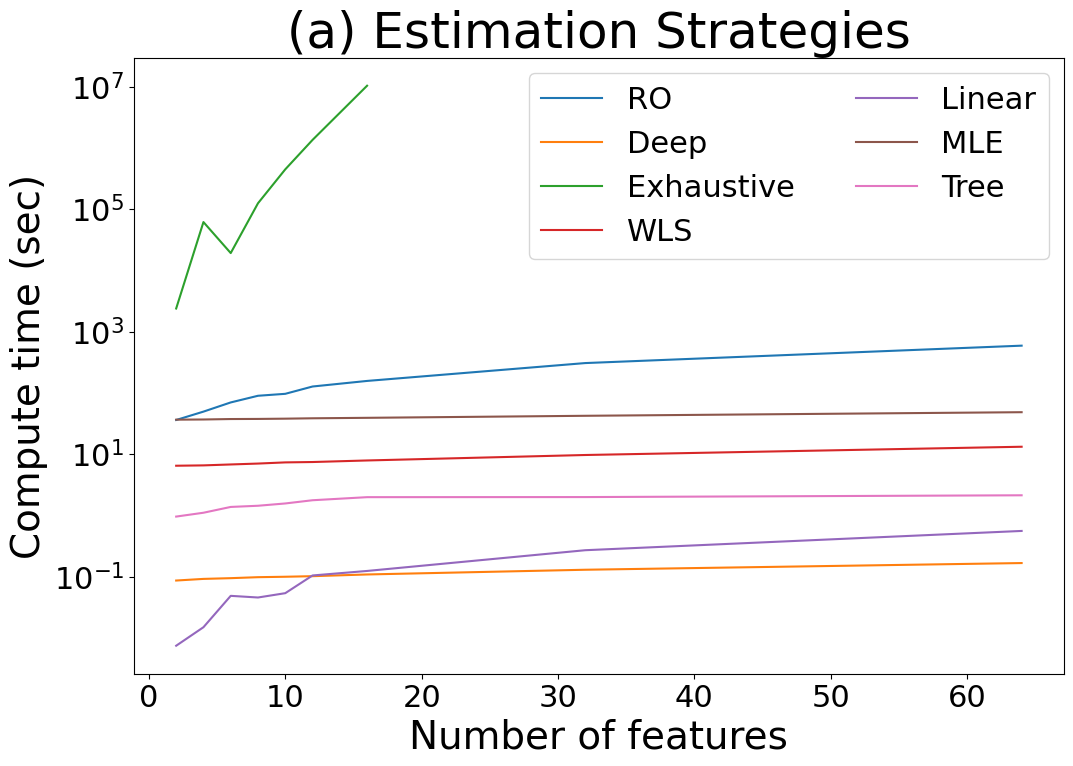

In [34]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

time_df = pd.read_csv('/data/suchit/project1/experiments/github/agnostic/tables/time_estimation.csv')
plt.figure(figsize=(12,8))
ax = sns.lineplot(time_df, x='Features', y='Time', hue='Method', ci=None)
ax.set_yscale('log')
ax.legend(loc='upper right',  fontsize=22, ncols=2)
ax.set_xlabel('Number of features', fontsize=28)
ax.set_ylabel('Compute time (sec)', fontsize=28)
plt.title("(a) Estimation Strategies", fontsize=36)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.savefig('dimensionality_estimation.pdf')


/tmp/ipykernel_2874646/2773047871.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(time_df, x='Features', y='Time', hue='Approximation', ci=None)


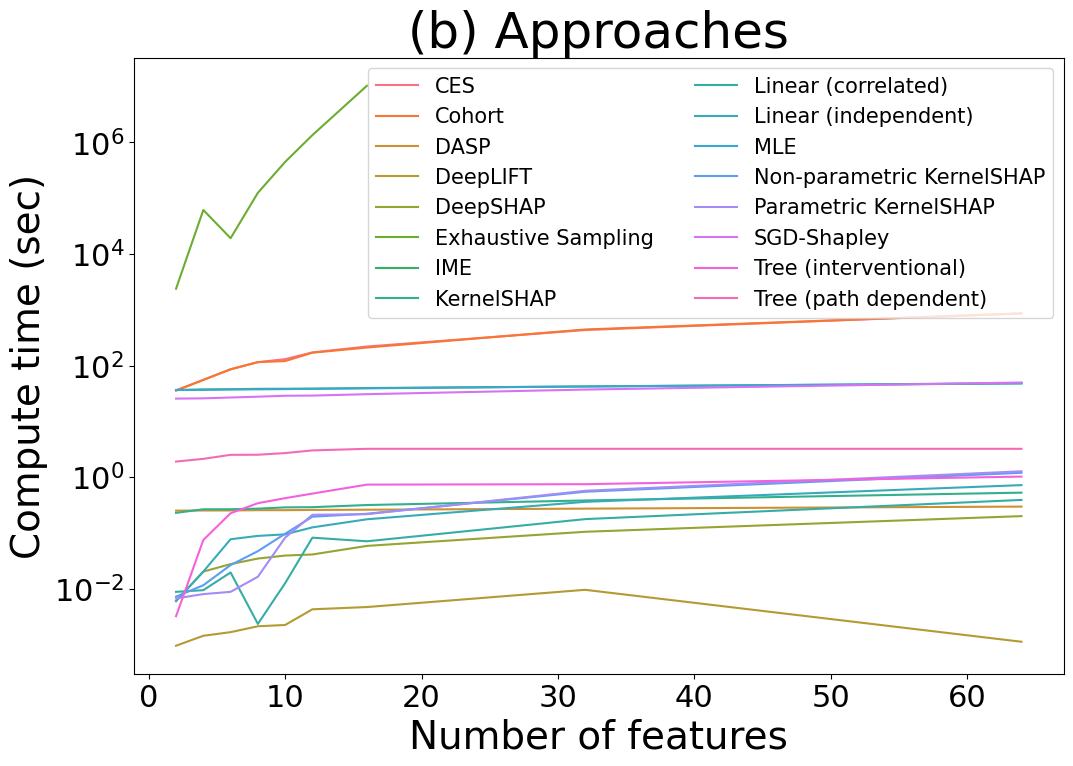

In [35]:
import seaborn as sns
import pandas as pd
time_df = pd.read_csv('/data/suchit/project1/experiments/github/agnostic/tables/time_approaches.csv')

plt.figure(figsize=(12,8))
ax = sns.lineplot(time_df, x='Features', y='Time', hue='Approximation', ci=None)
ax.set_yscale('log')
ax.legend(loc='upper right', ncol=2, fontsize=15)
ax.set_xlabel('Number of features', fontsize=28)
ax.set_ylabel('Compute time (sec)', fontsize=28)
plt.title("(b) Approaches", fontsize=36)

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.savefig('tradeoff.pdf')
plt.savefig('dimensionality_approaches.pdf')
